In [1]:
from IPython.display import display
import phik
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

**application_{train|test}.csv**

In [2]:
application_train = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project1-HOMECREDIT\home-credit-default-risk\application_train.csv")
print('application_train data shape: ', application_train.shape)
application_train.head()

application_train data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
print('-'*80)
print(f'The shape of application_train.csv is: {application_train.shape}')
print('-'*80)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of application_train.csv is: (307511, 122)
--------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
--------------------------------------------------------------------------------


In [5]:
application_test = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project1-HOMECREDIT\home-credit-default-risk\application_test.csv")
print('application_test data shape: ', application_test.shape)
application_test.head()

application_test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,...,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,...,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.375,0.0417,0.2078,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0

In [6]:
print('-'*80)
print(f'The shape of application_test.csv is: {application_test.shape}')
print('-'*80)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of application_test.csv is: (48744, 121)
--------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
--------------------------------------------------------------------------------


# 1. Data overview

In [8]:
install_pay = pd.read_csv(r"C:\Users\ADMIN\Downloads\Project1-HOMECREDIT\home-credit-default-risk\installments_payments.csv")
print('POS cash balance data shape: ', install_pay.shape)
install_pay.head()

POS cash balance data shape:  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [9]:
install_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [10]:
install_pay.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845


In [11]:
print(f'The shape of POS_CASH_balance.csv is: {install_pay.shape}')
print('-'*80)
print(f'Number of unique SK_ID_PREV in installments_payments.csv are: {len(install_pay.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in installments_payments.csv are: {len(install_pay.SK_ID_CURR.unique())}')
print('-'*80)
print(f'Number of overlapping SK_ID_CURR in application_train.csv and installments_payments.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(install_pay.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in application_test.csv and installments_payments.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(install_pay.SK_ID_CURR.unique())))}')
print('-'*80)
print(f'Number of duplicate values in install_pay: {install_pay.shape[0] - install_pay.duplicated().shape[0]}')

The shape of POS_CASH_balance.csv is: (13605401, 8)
--------------------------------------------------------------------------------
Number of unique SK_ID_PREV in installments_payments.csv are: 997752
Number of unique SK_ID_CURR in installments_payments.csv are: 339587
--------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in application_train.csv and installments_payments.csv are: 291643
Number of overlapping SK_ID_CURR in application_test.csv and installments_payments.csv are: 47944
--------------------------------------------------------------------------------
Number of duplicate values in install_pay: 0


# 2. Checking imbalance

The imbalance ratio (IR) is typically defined as:\
Imbalance Ratio = Number of samples in the majority class/ Number of samples in the minority class
* An imbalance ratio close to 1 indicates a balanced dataset (e.g., equal or nearly equal numbers of samples in each class).
* A low imbalance ratio (e.g., close to 0) indicates significant imbalance, meaning one class dominates the dataset.

In [12]:
"""
This file contains functions to calculate imbalance ratio of a dataset.

Functions:
    1. imbalance_col: function
        Function to create a dataframe of imbalance columns.
"""

def imbalance_col(data):
    """
    Function to create a dataframe of imbalance columns.

    Inputs:
        data: DataFrame
            The dataset for which to calculate imbalance ratios.

    Returns:
        DataFrame of imbalance columns and their respective imbalance ratios.
    """
    # Filter out columns containing '_ID_'
    relevant_columns = [col for col in data.columns if '_ID_' not in col]
    data = data[relevant_columns]

    imbalance_ratios = {}

    for col in data.columns:
        value_counts = data[col].value_counts()

        if data[col].dtype == 'object':
            # Categorical column imbalance ratio
            if len(value_counts) > 1:
                imbalance_ratios[col] = value_counts.min() / value_counts.max()
            else:
                imbalance_ratios[col] = None
        else:
            # Numerical column imbalance ratio for binary values (0 and 1)
            if set([0, 1]).issubset(value_counts.index):
                imbalance_ratios[col] = value_counts[1] / value_counts[0]
            else:
                imbalance_ratios[col] = None

    # Print imbalance ratios for all columns
    for col, ratio in imbalance_ratios.items():
        print(
            f"Imbalance Ratio for column '{col}': {f'{ratio:.4f}' if ratio is not None else 'None'}"
        )

    print('-' * 80)

    # Filter out columns with no valid imbalance ratio
    valid_ratios = {col: ratio for col, ratio in imbalance_ratios.items() if ratio is not None}

    if not valid_ratios:
        print("All columns do not have data to calculate the imbalance ratio.")
        return None

    # Find the column with the highest imbalance ratio
    max_imbalance_col = max(valid_ratios, key=valid_ratios.get)
    print(
        f"The column with the heaviest imbalance ratio is '{max_imbalance_col}' "
        f"with a ratio of {valid_ratios[max_imbalance_col]:.4f}"
    )

    # Return as a DataFrame for further use
    return pd.DataFrame.from_dict(valid_ratios, orient='index', columns=['Imbalance Ratio'])


In [13]:
imbalance_col(install_pay)

Imbalance Ratio for column 'NUM_INSTALMENT_VERSION': 2.0784
Imbalance Ratio for column 'NUM_INSTALMENT_NUMBER': None
Imbalance Ratio for column 'DAYS_INSTALMENT': None
Imbalance Ratio for column 'DAYS_ENTRY_PAYMENT': None
Imbalance Ratio for column 'AMT_INSTALMENT': None
Imbalance Ratio for column 'AMT_PAYMENT': None
--------------------------------------------------------------------------------
The column with the heaviest imbalance ratio is 'NUM_INSTALMENT_VERSION' with a ratio of 2.0784


,Imbalance Ratio
NUM_INSTALMENT_VERSION,2.078385


In [14]:
install_pay['NUM_INSTALMENT_VERSION'].value_counts()

NUM_INSTALMENT_VERSION
1.0      8485004
0.0      4082498
2.0       620283
3.0       237063
4.0        55274
5.0        48404
6.0        17092
7.0        16771
9.0         8359
8.0         7814
10.0        4637
11.0        4342
13.0        2951
12.0        2863
15.0        1917
14.0        1906
16.0        1283
17.0        1249
18.0         883
19.0         816
20.0         615
21.0         589
22.0         426
23.0         373
24.0         291
25.0         268
26.0         211
27.0         177
29.0         163
28.0         145
30.0         107
31.0         101
32.0          72
33.0          63
34.0          62
35.0          46
39.0          42
36.0          36
37.0          33
38.0          29
43.0          19
40.0          19
41.0          18
42.0          18
44.0          13
45.0           8
61.0           8
72.0           7
46.0           5
47.0           4
49.0           3
48.0           3
52.0           3
50.0           3
51.0           2
178.0          1
68.0           1
57.0    

## Observations 1
### 1. Columns with `None`
- Columns for which the imbalance ratio could not be computed due to insufficient data or missing values:
  - `NUM_INSTALMENT_NUMBER`
  - `DAYS_INSTALMENT`
  - `DAYS_ENTRY_PAYMENT`
  - `AMT_INSTALMENT`
  - `AMT_PAYMENT`
- The absence of an imbalance ratio could be due to:
  - Insufficient unique values or missing data.
  - Lack of conditions suitable for ratio computation.
- Recommendation: Handle missing data appropriately to improve model training.
  
### 2. Highly Dominant Column
- `NUM_INSTALMENT_VERSION`: 1.9154
  - The imbalance ratio of 1.9154 for the 'NUM_INSTALMENT_VERSION' column indicates that the distribution between its distinct values is heavily skewed. This ratio suggests that one class is almost twice as frequent as the other(s).
  - Potential impact:
    - Bias in machine learning models.
  - Recommended actions:
    - Oversample the minority class.
    - Undersample the majority class.
    - Use techniques like SMOTE (Syn approach to address dataset imbalances while tailoring preprocessing for downstream tasks.
aset while tailoring preprocessing to the needs of downstream tasks.




# 3. Checking outliers

In [15]:
def plot_boxplots(data, numerical_columns):
    """
    Creates box plots for each numerical column to visualize outliers.

    Parameters:
        data (DataFrame): The input dataset.
        numerical_columns (list): List of numerical column names.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

def get_outliers(data, outlier_threshold=1.5):
    """
    Identifies rows containing outliers for numerical columns based on the IQR method.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Returns:
        DataFrame: Rows containing outliers for numerical columns.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Calculate Q1, Q3, and IQR for numerical columns
    q1 = data[numerical_columns].quantile(0.25)
    q3 = data[numerical_columns].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using the IQR method
    outliers = ((data[numerical_columns] < (q1 - outlier_threshold * iqr)) |
                (data[numerical_columns] > (q3 + outlier_threshold * iqr)))

    return data[outliers.any(axis=1)]

def outlier(data, outlier_threshold=1.5):
    """
    Main function to visualize and identify outliers in the dataset.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Outputs:
        Prints a DataFrame containing rows with outliers.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Plot boxplots for numerical columns
    plot_boxplots(data, numerical_columns)

    # Get rows with outliers
    rows_with_outliers = get_outliers(data, outlier_threshold)
    print("Rows with outliers:")
    print(rows_with_outliers)

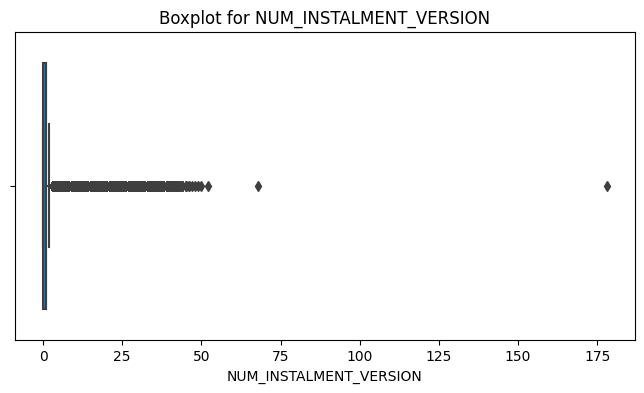

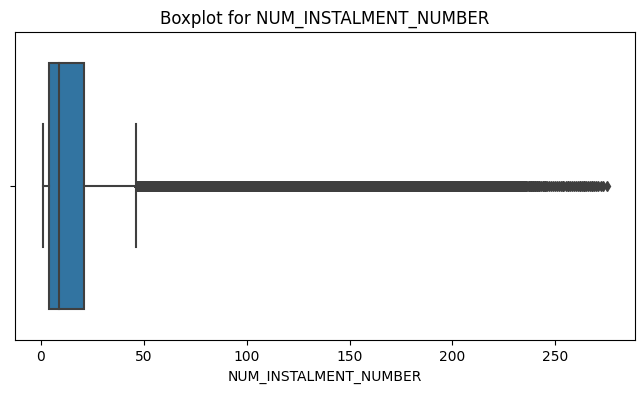

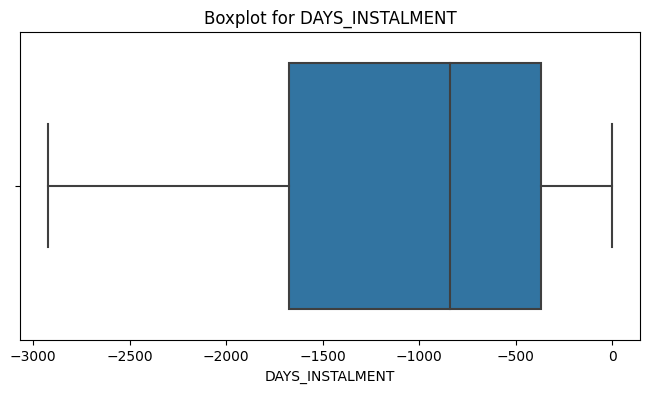

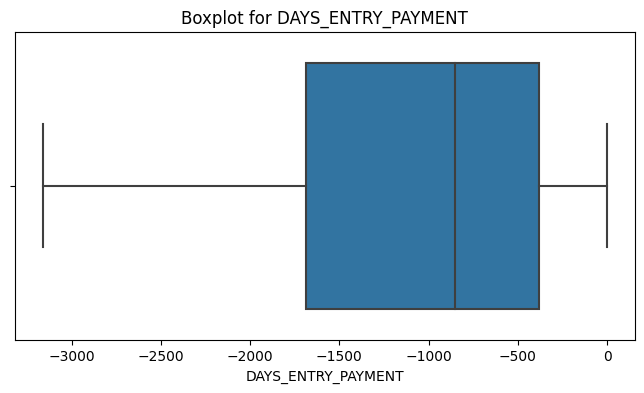

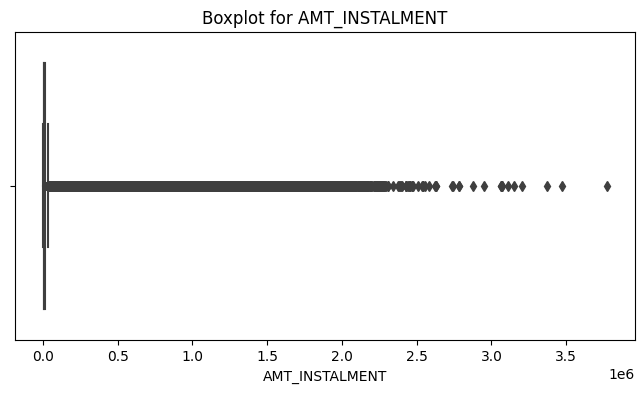

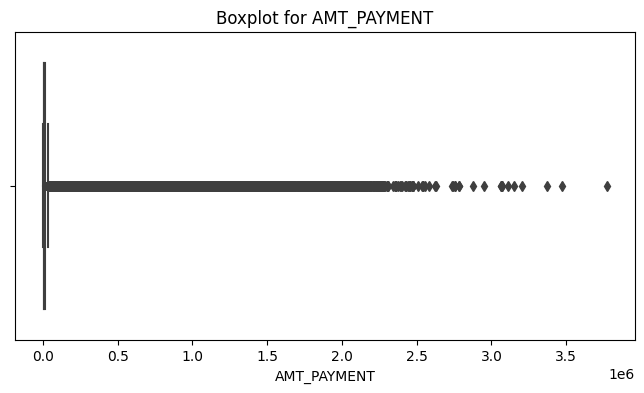

Rows with outliers:
         SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
16          1065354    147397.0                     2.0   
94          1588995    147397.0                     2.0   
102         1330831     70226.0                     0.0   
104         1330831     70226.0                     0.0   
108         1330831     70226.0                     0.0   
...             ...         ...                     ...   
7744750     2425213     21216.0                     1.0   
7744752     2657771     21216.0                     0.0   
7744754     2208281     21216.0                     1.0   
7744756     2657771     21216.0                     0.0   
7744757     2657771         NaN                     0.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
16                           2           -272.0              -299.0   
94                          11          -1431.0             -1454.0   
102                         47          -1761.0           

In [15]:
outlier(install_pay)

## Observations 2

### **Columns with Potential Outliers**

1. **Numerical Columns**:  
   - `NUM_INSTALMENT_VERSION`, `NUM_INSTALMENT_NUMBER`, `AMT_INSTALMENT`, `AMT_PAYMENT`:  
     No information about outliers was identified in these columns. Additional analysis or visualization may be required.


# 4. Checking missing values

In [16]:
def nan_percent(data):
    '''
    Function to create a dataframe of percentage of NaN values for each column of the dataframe

    Inputs:
        data (DataFrame): Input DataFrame

    Returns:
        DataFrame: A DataFrame containing the columns and their percentage of NaN values
    '''
    # Calculate the percentage of NaN values for each column
    nan_percentages = data.isnull().mean() * 100
    df_nan = nan_percentages.reset_index().rename(columns={0: 'Percentage_of_NaN', 'index': 'Column'})

    # Sorting the dataframe by decreasing order of percentage of NaN values
    df_nan = df_nan.sort_values(by='Percentage_of_NaN', ascending=False)

    return df_nan


def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 10), grid=False, rotation=90):
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values

    Inputs:
        df_nan (DataFrame): DataFrame containing columns and their NaN percentages
        title_name (str): Title for the plot
        tight_layout (bool, default=True): Whether to use tight layout for the plot
        figsize (tuple, default=(20, 10)): Size of the plot
        grid (bool, default=False): Whether to display gridlines on the plot
        rotation (int, default=90): Degree of rotation for x-tick labels
    '''

    # Filter for columns with non-zero NaN percentages
    df_nan_nonzero = df_nan[df_nan['Percentage_of_NaN'] > 0]

    if not df_nan_nonzero.empty:
        print(f"Number of columns with NaN values: {df_nan_nonzero.shape[0]}")

        # Plotting the Bar Plot for NaN percentages
        plt.figure(figsize=figsize)
        sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')
        plt.xticks(rotation=rotation)
        plt.xlabel(title_name, fontsize=13)
        plt.ylabel('Percentage of NaN', fontsize=13)
        plt.title(f'Percentage of NaN values in {title_name}', fontsize=22, weight='bold', pad=30)
        
        if grid:
            plt.grid(True)

        if tight_layout:
            plt.tight_layout()

        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")


In [17]:
nan_pv = nan_percent(install_pay)
nan_pv

,Column,Percentage_of_NaN
7,AMT_PAYMENT,0.021352
5,DAYS_ENTRY_PAYMENT,0.021352
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
3,NUM_INSTALMENT_NUMBER,0.000000
2,NUM_INSTALMENT_VERSION,0.000000
4,DAYS_INSTALMENT,0.000000
6,AMT_INSTALMENT,0.000000


Number of columns with NaN values: 2


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_35380\3747520759.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')


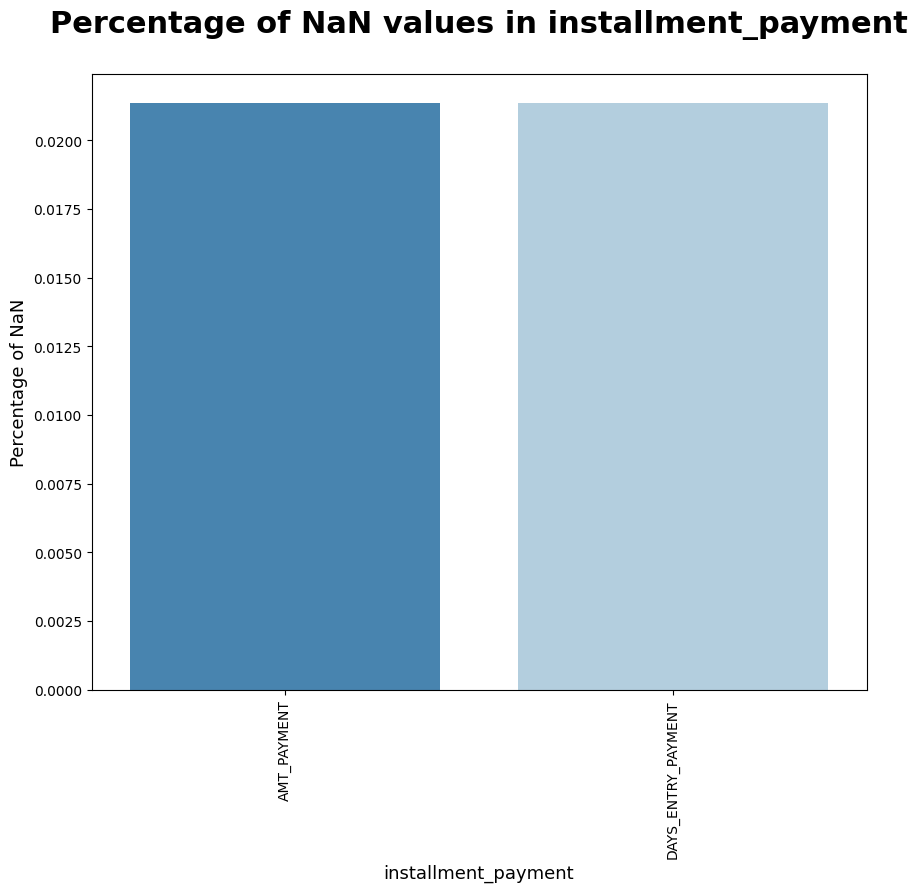

In [18]:
plot_nan_percent(nan_pv, 'installment_payment', tight_layout = False, figsize = (10,8))

In [19]:
install_pay.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [20]:
install_pay[install_pay['SK_ID_CURR'].isnull()==True]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT


In [21]:
install_pay.dropna(subset=['SK_ID_CURR'], inplace=True)

In [22]:
install_pay.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

## Observations 3
**Columns have Missing Values:**
- `AMT_PAYMENT`: 0.021163%
- `DAYS_ENTRY_PAYMENT`: 0.021163%
- `SK_ID_CURR`: 0.000013%
- `AMT_INSTALMENT`: 0.000013%
We drop the row that have empty 'SK_ID_CURR' due to the small amount of info in this only one row\
If we look at the percentages of NaN values, they are considerably lower than the rest of the tables we have seen so far.

# 5. Checking categorical columns

In [23]:

def get_category_columns(data):
    """
    Returns a DataFrame with details about categorical columns, including unique value counts and NaN percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing feature names, unique counts, and NaN percentages.
    """
    category_columns = data.select_dtypes(include='object').columns
    column_info = pd.DataFrame({
        'Feature': category_columns,
        'Nunique': [data[col].nunique() for col in category_columns],
        'Percentage_of_NaN': [data[col].isnull().mean() * 100 for col in category_columns]
    }).sort_values(by='Percentage_of_NaN', ascending=False)
    return column_info

def plot_category_summary(data, name, figsize=(12, 8)):
    """
    Plots the number of unique values for categorical columns.

    Parameters:
        data (pd.DataFrame): The categorical column summary DataFrame.
        name (str): The dataset name.
        figsize (tuple): Figure size for the plot.
    """
    data = data.sort_values(by='Nunique', ascending=False)
    plt.figure(figsize=figsize)
    sns.barplot(x='Nunique', y='Feature', data=data, palette='Blues_r')
    plt.title(f'Unique Value Counts in Categorical Columns - {name}', fontsize=18, weight='bold')
    plt.xlabel('Number of Unique Values')
    plt.ylabel('Categorical Columns')
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, column_name, figsize=(18, 6), show_percentage=True, rotation=0):
    """
    Plots the distribution of a categorical variable and optionally shows percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the categorical column to plot.
        figsize (tuple): Size of the plot figure.
        show_percentage (bool): Whether to display percentages on the bars.
        rotation (int): Degree of rotation for x-tick labels.
    """
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=value_counts.index, y=value_counts, palette='Blues_r')
    plt.title(f'Distribution of {column_name}', fontsize=18, weight='bold')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=rotation)

    if show_percentage:
        total = value_counts.sum()
        for i, count in enumerate(value_counts):
            plt.text(i, count + 0.02 * total, f'{(count / total) * 100:.1f}%', ha='center', fontsize='small')

    plt.tight_layout()
    plt.show()

def plot_defaulter_comparison(data, x):
    """
    Plots pie charts for distribution of a categorical variable by default status.

    Parameters:
        data (pd.DataFrame): The input DataFrame with a "TARGET" column.
        column_name (str): Name of the categorical column to plot.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    x1 = data[data["TARGET"] == 0][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[0].pie(x1, labels=x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-defaulter")

    x2 = data[data["TARGET"] == 1][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Defaulter")

    ax[1].legend(loc='upper right', bbox_to_anchor=(1.5, 1), title=x)

    for i in range(2):
        for text in ax[i].texts[::2]:
            text.set_visible(False)

    fig.suptitle(f"Distribution of {x}\nwith TARGET", fontsize=20)

    fig.tight_layout()
    plt.tight_layout()
    plt.show()


def print_unique_categories(data, column_name, show_counts=False):
    """
    Prints unique categories of a column and optionally their counts.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to analyze.
        show_counts (bool): Whether to display counts for each category.
    """
    unique_values = data[column_name].unique()
    print(f"Unique categories in '{column_name}': {unique_values}")

    if show_counts:
        counts = data[column_name].value_counts()
        print(f"\nCounts for each category in '{column_name}':\n{counts}")


In [24]:
cate_pv = get_category_columns(install_pay)
cate_pv

,Feature,Nunique,Percentage_of_NaN


## Observations 4
- There is no categorical column in this dataset

# 6. EDA

## **6.1. Correlation**

In [25]:

class CorrelationMatrix:
    def __init__(self, data, columns_to_drop=None, figsize=(25, 23), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues'):
        self.data = data
        self.columns_to_drop = columns_to_drop if columns_to_drop else []
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap
        self.corr_data = None

    def plot_correlation_matrix(self, round_decimals=2):
        """Plots the correlation matrix heatmap."""
        data = self.data.drop(self.columns_to_drop + ['TARGET'], axis=1, errors='ignore')
        self.corr_data = data.corr(numeric_only=True)

        # Create mask for upper triangle
        mask = None
        if self.mask_upper:
            mask = np.triu(np.ones_like(self.corr_data, dtype=bool))

        # Plot heatmap
        plt.figure(figsize=self.figsize)
        sns.heatmap(
            self.corr_data.round(round_decimals),
            annot=True,
            mask=mask,
            cmap=self.cmap,
            linewidths=self.linewidth,
            fmt=f".{round_decimals}f"
        )
        plt.xticks(rotation=90, fontsize=self.fontsize)
        plt.yticks(fontsize=self.fontsize)
        plt.title("Correlation Heatmap for Numerical Features", size=20, weight='bold', pad=20)
        plt.tight_layout()
        plt.show()

    def target_top_corr(self, target_top_columns=10):
        """Returns the top correlated features with the target."""
        if 'TARGET' not in self.data:
            raise ValueError("Target column not found in data.")

        # Calculate correlations with target
        target_corr = self.data.corr(numeric_only=True)['TARGET']
        top_corr = target_corr.abs().sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': top_corr.index, 'Correlation': top_corr.values})

        return top_corr_df


def numeric_cor(data, round_decimals=2):
    """Plots the correlation of numerical features."""
    numeric_df = data.select_dtypes(include='number')
    numeric_df_corr = numeric_df.corr()

    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(numeric_df_corr, dtype=bool))
    sns.heatmap(
        numeric_df_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap='Blues',
        linewidth=0.5,
        fmt=f".{round_decimals}f"
    )
    plt.title("Correlation of Numerical Features", fontsize=20, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()


def plot_phik_matrix(data, categorical_columns, figsize=(20, 20), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues', show_target_top_corr=True, target_top_columns=10, round_decimals=2):
    """Plots the Phi-K correlation matrix for categorical features."""
    # Calculate Phi-K correlation
    data_for_phik = data[categorical_columns].astype(str)
    phik_corr = data_for_phik.phik_matrix()

    # Create mask
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(phik_corr, dtype=bool))

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        phik_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap=cmap,
        linewidths=linewidth,
        fmt=f".{round_decimals}f"
    )
    plt.title("Phi-K Correlation Heatmap for Categorical Features", fontsize=20, weight='bold', pad=20)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

    # Display top correlations with target
    if show_target_top_corr and 'TARGET' in data.columns:
        phik_target = phik_corr['TARGET'].sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': phik_target.index, 'Phi-K Correlation': phik_target.values})
        print("Top correlated features with TARGET:")
        display(top_corr_df)


In [26]:
install_pay.corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,-0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,-0.000548,0.001191,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,-0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,-0.002095,-0.000548,-0.323414,1.000000,0.090286,0.094305,-0.089640,-0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,-0.000226,0.168109,-0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


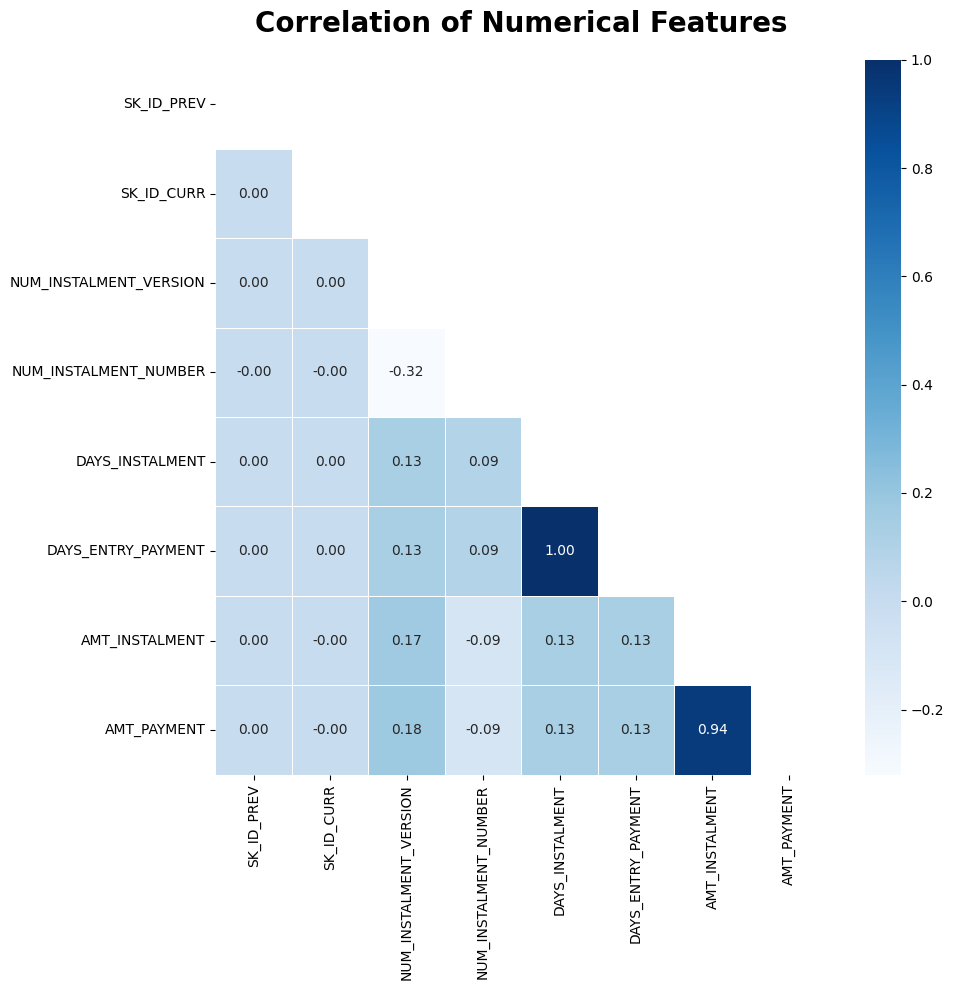

In [27]:
numeric_cor(install_pay)

### Observations 5
- **Highly Correlated Features**:
  - `"DAYS_INSTALMENT"` and `"DAYS_ENTRY_PAYMENT"`: 1
  - `"AMT_PAYMENT"` and `"AMT_INSTALMENT"`: 0.94

- **Features to Remove**:
  - `"DAYS_ENTRY_PAYMENT"`
  These features should be removed to prevent collinearity.


In [28]:
install_pay_drop = install_pay.drop(labels=["DAYS_ENTRY_PAYMENT"], axis=1)

In [29]:
install_pay_drop.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT'],
      dtype='object')

## 6.2 Merge with application_train

In [30]:
install_pay_merged = pd.merge(application_train[['SK_ID_CURR','TARGET']], install_pay, how = 'left', on=['SK_ID_CURR'])
install_pay_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690


In [31]:
install_pay_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607460 entries, 0 to 11607459
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   TARGET                  int64  
 2   SK_ID_PREV              float64
 3   NUM_INSTALMENT_VERSION  float64
 4   NUM_INSTALMENT_NUMBER   float64
 5   DAYS_INSTALMENT         float64
 6   DAYS_ENTRY_PAYMENT      float64
 7   AMT_INSTALMENT          float64
 8   AMT_PAYMENT             float64
dtypes: float64(7), int64(2)
memory usage: 797.0 MB


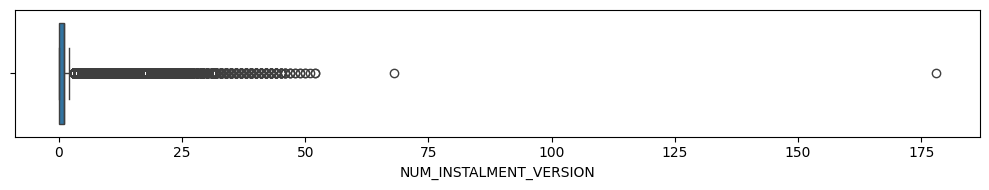

In [32]:
plt.figure(figsize=(10,2))
sns.boxplot(install_pay_merged["NUM_INSTALMENT_VERSION"], orient='h')

plt.tight_layout()
plt.show()

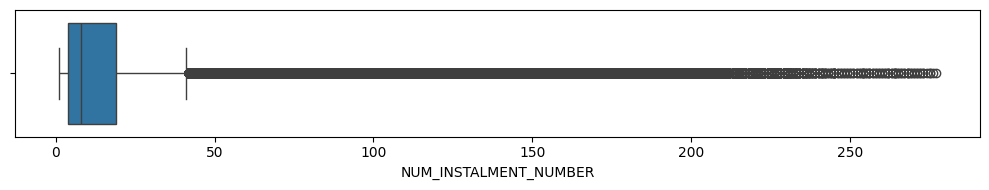

In [33]:
plt.figure(figsize=(10,2))
sns.boxplot(install_pay_merged["NUM_INSTALMENT_NUMBER"], orient='h')

plt.tight_layout()
plt.show()

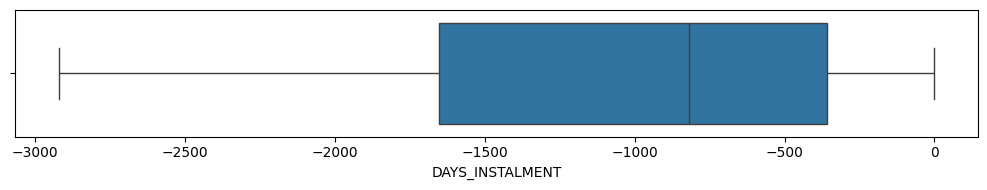

In [34]:
plt.figure(figsize=(10,2))
sns.boxplot(install_pay_merged["DAYS_INSTALMENT"], orient='h')

plt.tight_layout()
plt.show()

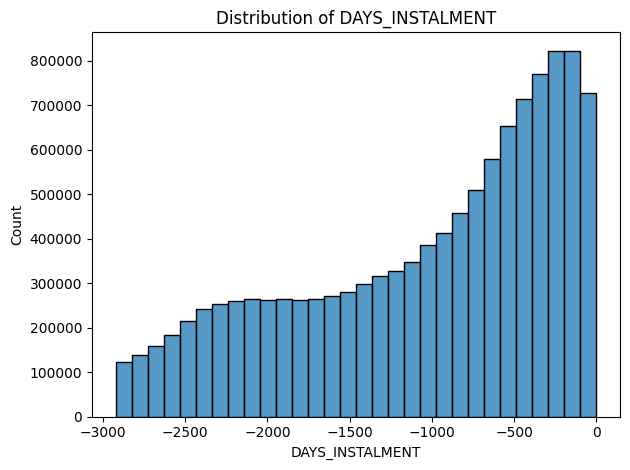

In [35]:
sns.histplot(data=install_pay_merged, x="DAYS_INSTALMENT", bins=30, kde=False)
plt.title("Distribution of DAYS_INSTALMENT")
plt.tight_layout()
plt.show()

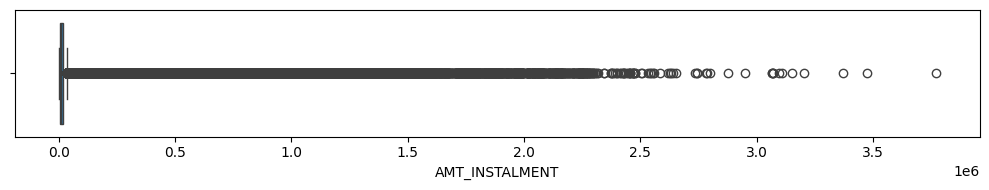

In [36]:
plt.figure(figsize=(10,2))
sns.boxplot(install_pay_merged["AMT_INSTALMENT"], orient='h')

plt.tight_layout()
plt.show()

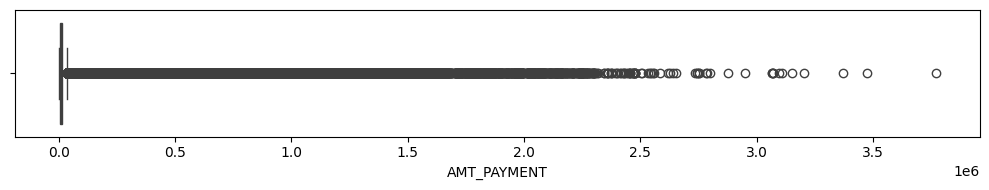

In [37]:
plt.figure(figsize=(10,2))
sns.boxplot(install_pay_merged["AMT_PAYMENT"], orient='h')

plt.tight_layout()
plt.show()

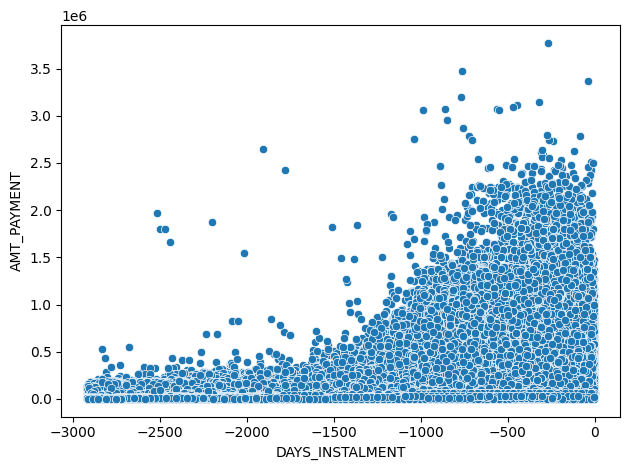

In [38]:
sns.scatterplot(data=install_pay_merged, x="DAYS_INSTALMENT", y= 'AMT_PAYMENT')
plt.tight_layout()
plt.show()

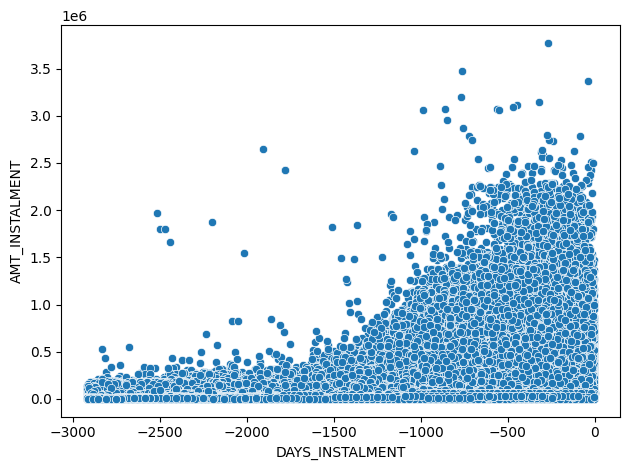

In [39]:
sns.scatterplot(data=install_pay_merged, x="DAYS_INSTALMENT", y= 'AMT_INSTALMENT')
plt.tight_layout()
plt.show()

Loans have high installments usually have DAY_INSTALLMENT near the current contract

In [40]:
def plot_distribution(data, column_name, column_name2=None,
                      plot_type='dist', nrows=1, ncols=2,
                      figsize=(12, 6), dropna=False,
                      sort_values=False, bins='auto', palette='Blues_r'):
    """
    Function to plot the distribution of a variable related to a target variable.
    """
    if plot_type == 'scatter' and column_name2 is None:
        raise ValueError("You must provide `column_name2` for scatter plots.")
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()

    if dropna:
        data = data.dropna(subset=[column_name, column_name2] if column_name2 else [column_name])
    if sort_values:
        data = data.sort_values(by=column_name)

    targets = data['TARGET'].unique()
    for i, target in enumerate(targets):
        subset = data[data['TARGET'] == target]
        title = f"Target = {target}"
        
        if plot_type == 'dist':
            sns.histplot(subset[column_name], bins=bins, kde=True, ax=ax[i])
        elif plot_type == 'hist':
            sns.histplot(subset[column_name], bins=bins, kde=False, ax=ax[i])
        elif plot_type == 'count':
            sns.countplot(x=subset[column_name], ax=ax[i], palette=palette)
        elif plot_type == 'box':
            sns.boxplot(x=subset[column_name], ax=ax[i], orient='h')
        elif plot_type == 'scatter':
            sns.scatterplot(
                x=subset[column_name],
                y=subset[column_name2],
                ax=ax[i],
                color="blue" if target == 0 else "orange"  # Assign colors manually
            )

        ax[i].set_title(title)
        ax[i].tick_params(axis='x', rotation=45)

    fig.tight_layout()
    plt.show()


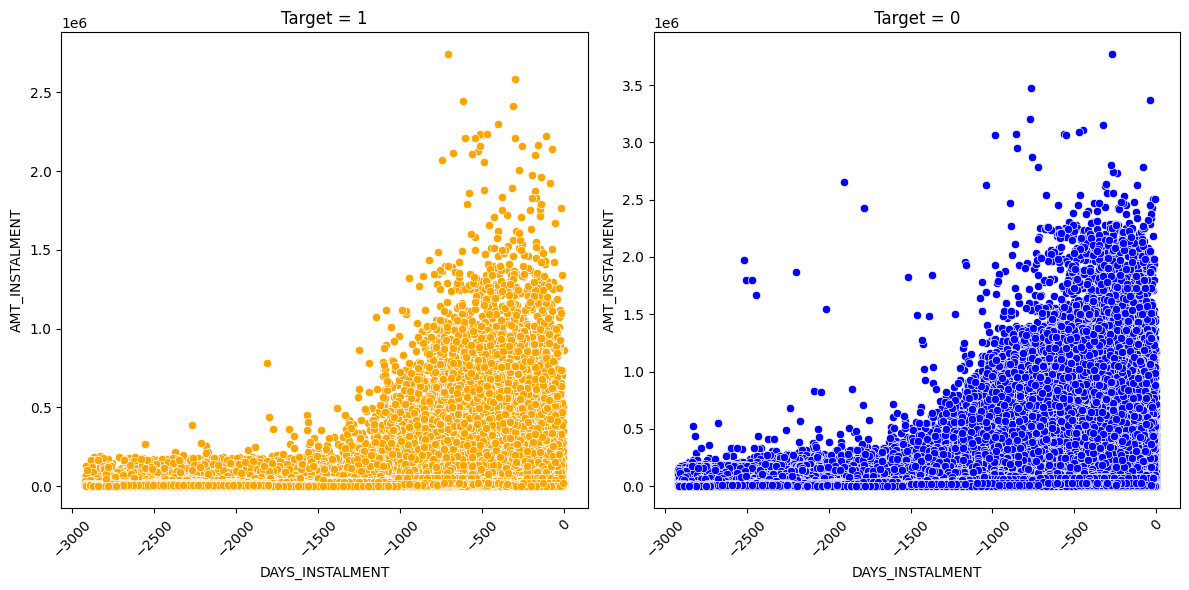

In [41]:
plot_distribution(data = install_pay_merged, column_name='DAYS_INSTALMENT', column_name2='AMT_INSTALMENT', plot_type='scatter')

In [42]:
def convert_month(day_to_month):
    day_to_month_1 = day_to_month/30 
    return day_to_month_1
install_pay_merged['DAYS_INSTALMENT_MONTH'] =  install_pay_merged['DAYS_INSTALMENT'].apply(convert_month)


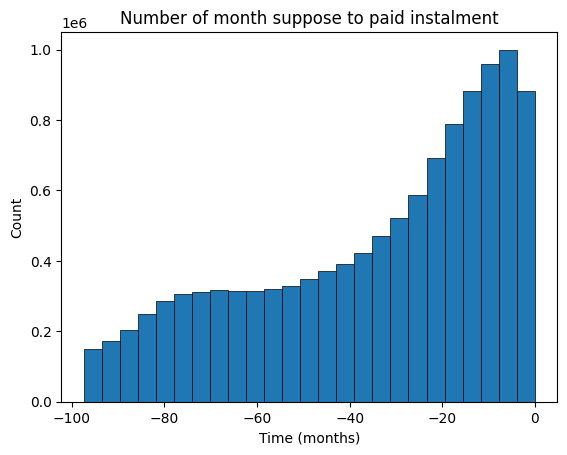

In [43]:
plt.hist(install_pay_merged['DAYS_INSTALMENT_MONTH'], bins = 25, edgecolor = 'black', linewidth = 0.5)
plt.title('Number of month suppose to paid instalment')
plt.xlabel('Time (months)')
plt.ylabel('Count')
plt.show()

In [44]:
install_pay_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'DAYS_INSTALMENT_MONTH'],
      dtype='object')

In [45]:
#add flag to indicate installment received on time and the minimum payment was received
def on_time(x):
    timely = x['DAYS_INSTALMENT'] >= x['DAYS_ENTRY_PAYMENT']
    min_met = x['AMT_PAYMENT'] >= x['AMT_INSTALMENT']
    if timely and min_met:
        return 1
    else:
        return 0
# Pay on time and enough money? 
install_pay_merged['TIMELY_FLAG'] = install_pay_merged.apply(on_time,axis=1)

In [46]:
install_pay_merged['TIMELY_SUM'] = install_pay_merged.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('sum')
install_pay_merged['INSTALLMENT_COUNT'] =install_pay_merged.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('count')

In [47]:
features = ['TIMELY_SUM','INSTALLMENT_COUNT']
install_pay_merged_final = install_pay_merged.groupby(['SK_ID_CURR'])[features].first().reset_index()

In [48]:
install_pay_merged_final['TIMELY_PERCENT'] = install_pay_merged['TIMELY_SUM'] / install_pay_merged['INSTALLMENT_COUNT']
install_pay_merged_final['TIMELY_PERCENT'].describe()

count    307511.000000
mean          0.867484
std           0.167862
min           0.000000
25%           0.806122
50%           0.929577
75%           1.000000
max           1.000000
Name: TIMELY_PERCENT, dtype: float64

In [49]:
def payment_cat(x):
    '''Put each id into a category based timely payments rate.'''
    if x >= 0.89:
        return 'Good'
    elif x >= 0.83:
        return 'Par'
    elif x >= 0.71:
        return 'Sub_Par'
    elif x >= 0.53:
        return 'Poor'
    else:
        return 'Very_Poor'

install_pay_merged_final['INSTALL_PAY_PAYMENT_GRADE'] = install_pay_merged_final['TIMELY_PERCENT'].apply(payment_cat)

In [50]:
install_pay_merged_final.groupby(['INSTALL_PAY_PAYMENT_GRADE'])['TIMELY_PERCENT'].describe()

,count,mean,std,min,25%,50%,75%,max
INSTALL_PAY_PAYMENT_GRADE,,,,,,,,
Good,188581.0,0.969350,0.034384,0.890244,0.943396,0.980198,1.000000,1.000000
Par,32945.0,0.862620,0.017622,0.830189,0.846154,0.864662,0.878261,0.889831
Poor,29598.0,0.634469,0.050534,0.531250,0.595238,0.641304,0.679012,0.709677
Sub_Par,38454.0,0.775134,0.034320,0.710145,0.745763,0.777778,0.805310,0.829787
Very_Poor,17933.0,0.387832,0.127712,0.000000,0.320000,0.424658,0.488372,0.529412


In [51]:
install_pay_merged_final.columns

Index(['SK_ID_CURR', 'TIMELY_SUM', 'INSTALLMENT_COUNT', 'TIMELY_PERCENT',
       'INSTALL_PAY_PAYMENT_GRADE'],
      dtype='object')

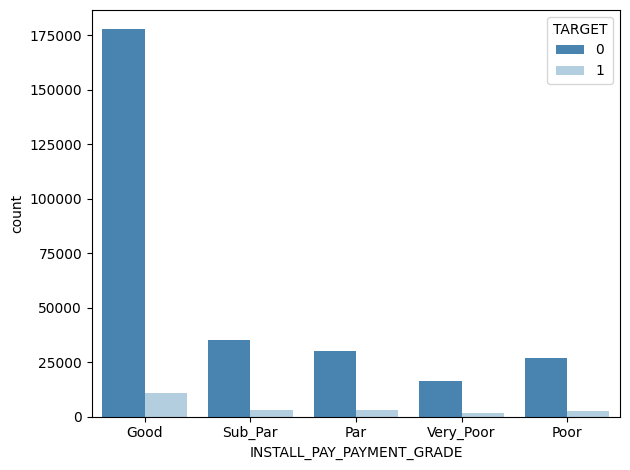

In [52]:
sns.countplot(x = install_pay_merged_final["INSTALL_PAY_PAYMENT_GRADE"], hue= install_pay_merged["TARGET"], palette= "Blues_r")
plt.tight_layout()
plt.show()

INSTALL_PAY_PAYMENT_GRADE may not be a good attribute to determine the defaulters

1. Imbalance Ratios:
- Most columns do not exhibit significant class imbalance.
- `'NUM_INSTALMENT_VERSION'` has the highest imbalance ratio at 1.9154.

2. Percentage of Missing Values:
- `'DAYS_ENTRY_PAYMENT'` and `'AMT_PAYMENT'` have a slightly higher percentage of missing values at 0.021163%.
- Other columns, including `'AMT_INSTALMENT,'` `'SK_ID_CURR,'` `'SK_ID_PREV,'` `'NUM_INSTALMENT_VERSION,'` `'NUM_INSTALMENT_NUMBER,'` and `'DAYS_INSTALMENT,'` show no missing values or a very small percentage.

3. Rows with Outliers:
- Identified rows with potential outliers in various columns, such as `'NUM_INSTALMENT_VERSION,'` `'NUM_INSTALMENT_NUMBER,'` `'DAYS_INSTALMENT,'` `'DAYS_ENTRY_PAYMENT,'` `'AMT_INSTALMENT,'` and `'AMT_PAYMENT.'`
- Outliers may impact analysis and modeling and should be carefully evaluated.
- Missing values in `'DAYS_ENTRY_PAYMENT,'` `'AMT_INSTALMENT,'` and `'AMT_PAYMENT'` columns should be addressed during data preprocessing.eprocessing.